<a href="https://colab.research.google.com/github/f-Ayuk/Formative2_Principle-Component-Analysis/blob/main/Favor_Ayuk_PCA_Formative_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with the `co2 Emission Africa.csv` dataset.

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

In [ ]:
# Step 1: Load and Standardize the data (use of numpy only allowed for PCA computations)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load the dataset mentioned in the notebook description
df = pd.read_csv('/content/co2 Emission Africa.csv')

df.head()


# Check missing values
df.isnull().sum()


# Identify non-numeric columns
df.select_dtypes(exclude=[np.number]).columns


# Drop rows with missing values
df_clean = df.dropna()

# Select only numeric columns
numeric_df = df_clean.select_dtypes(include=[np.number])

print("Original shape:", df.shape)
print("After cleaning:", numeric_df.shape)

# Convert to numpy array
X = numeric_df.values

# Standardize manually (sample standard deviation)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0, ddof=1)

X_standardized = (X - X_mean) / X_std

# Output the first few rows of standardized data
print("Standardized Data (first 5 rows):")
print(X_standardized[:5])

Original shape: (1134, 20)
After cleaning: (330, 17)
Standardized Data (first 5 rows):
[[-1.71236934 -0.14221706 -0.49820567 -0.00484309  1.83802414  0.21037477
  -0.18468763  0.17433575 -0.54601102 -0.07380296 -0.37593829  0.22341575
   1.27869915  0.16862181  0.00295706  0.03727633  0.72157778]
 [-1.54757439 -0.13193075 -0.50550385  0.0405055   1.83802414  0.22159004
  -0.21530375  0.1608301  -0.54601102 -0.06697659 -0.40111749  0.21913724
   0.91579082  0.15495512  0.01836803  0.04363682  0.74973808]
 [-1.38277944 -0.12170845 -0.49412378  0.11101129  1.83802414  0.35853433
  -0.18902142  0.19700595 -0.54601102 -0.03891262 -0.40111749  0.28117556
   0.70733829  0.1893199   0.04948922  0.10406148  0.80042661]
 [-1.21798449 -0.11130578 -0.40297003  0.21176504  1.83802414  0.50020084
  -0.14861932  0.25286147 -0.54601102 -0.00933167 -0.40111749  0.2747578
   0.95471871  0.24685863  0.05322975  0.01501461  0.91165979]
 [-1.05318954 -0.10034542 -0.25934009  0.28936877  1.83802414  0.51613

In [ ]:
# Display the column names of the dataframe
print("Columns in the dataframe:")
print(df.columns.tolist())

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [ ]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(X_standardized, rowvar=False)

# Output the covariance matrix
cov_matrix

array([[ 1.        ,  0.10715493,  0.13741905,  0.05381159, -0.00759509,
         0.14421449,  0.05981074,  0.04755424,  0.09103753,  0.01278057,
         0.0306468 ,  0.11472625, -0.14176994,  0.04351085,  0.03457667,
        -0.06447078,  0.05934052],
       [ 0.10715493,  1.        , -0.2909631 , -0.29320528,  0.27319427,
         0.65152209,  0.49341494,  0.38750766,  0.4338833 ,  0.32420465,
         0.25702699,  0.50577269,  0.55012838,  0.37440135,  0.2295928 ,
         0.2990313 ,  0.27003127],
       [ 0.13741905, -0.2909631 ,  1.        ,  0.92409713, -0.13291578,
         0.09054955, -0.11225555,  0.17065866,  0.07913549,  0.14564523,
        -0.28516822, -0.0157963 , -0.03356915,  0.17592551,  0.20225712,
         0.14858481,  0.12729381],
       [ 0.05381159, -0.29320528,  0.92409713,  1.        , -0.0523068 ,
         0.16263384, -0.14446615,  0.19408273,  0.08898603,  0.17516689,
        -0.34462087,  0.11078804,  0.00903724,  0.19411268,  0.19381758,
         0.14569254

### Determine the Number of Components (Explained Variance)
To dynamically select the number of principal components, we can analyze the explained variance ratio of each component and the cumulative explained variance. This helps us determine how many components are needed to retain a desired percentage of the total variance.

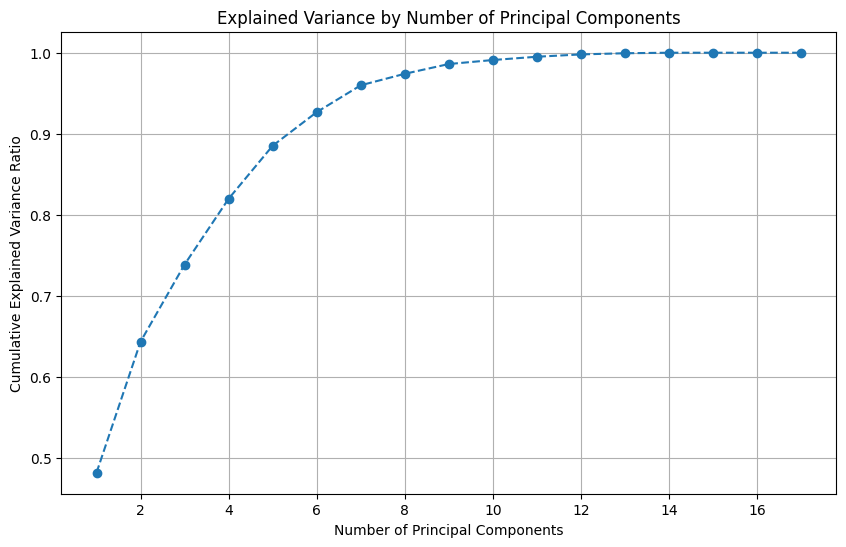

Number of components to retain 95% variance: 7


In [ ]:
# Determine the Number of Components (Explained Variance)

# Calculate the explained variance ratio
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance ratio and cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# You can choose the number of components based on the plot, e.g., where the curve plateaus or reaches a desired variance (e.g., 95%)
# Example: Find the number of components to retain 95% of variance
num_components_95_variance = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {num_components_95_variance}")

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [ ]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Perform eigendecomposition
eigenvalues, eigenvectors

(array([8.19902480e+00, 2.74554004e+00, 1.61748433e+00, 1.37772388e+00,
        1.11041773e+00, 7.04000250e-01, 5.63004635e-01, 2.41125235e-01,
        2.04607934e-01, 8.40511137e-02, 6.88023973e-02, 4.87476213e-02,
        2.46200681e-02, 1.08499650e-02, 5.34517339e-09, 1.03040615e-09,
        5.36683768e-10]),
 array([[ 2.47752831e-02, -2.12679684e-02,  3.71925323e-02,
          2.26054861e-01,  8.60553994e-01,  1.13693993e-01,
          3.88896541e-01,  8.73970819e-03,  1.00608944e-01,
          1.38086841e-01,  1.06458043e-01, -2.34660836e-02,
         -2.33635896e-02,  5.77989403e-03, -3.08375102e-06,
          1.81667482e-06,  6.22211067e-07],
        [ 1.68277877e-01,  3.59597115e-01, -3.57985299e-01,
          1.45116529e-01,  1.03347275e-01,  3.32205641e-01,
         -2.11757611e-01, -4.01305612e-01, -2.33940104e-01,
         -9.61038645e-02, -3.01901868e-01, -6.52718377e-02,
         -3.96963291e-01,  2.21996694e-01,  1.62417616e-05,
          2.75013224e-06, -3.98741667e-06]

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

In [ ]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Output sorted eigenvectors
sorted_eigenvectors

array([[ 2.47752831e-02, -2.12679684e-02,  3.71925323e-02,
         2.26054861e-01,  8.60553994e-01,  1.13693993e-01,
         3.88896541e-01,  8.73970819e-03,  1.00608944e-01,
         1.38086841e-01,  1.06458043e-01, -2.34660836e-02,
        -2.33635896e-02,  5.77989403e-03, -3.08375102e-06,
         1.81667482e-06,  6.22211067e-07],
       [ 1.68277877e-01,  3.59597115e-01, -3.57985299e-01,
         1.45116529e-01,  1.03347275e-01,  3.32205641e-01,
        -2.11757611e-01, -4.01305612e-01, -2.33940104e-01,
        -9.61038645e-02, -3.01901868e-01, -6.52718377e-02,
        -3.96963291e-01,  2.21996694e-01,  1.62417616e-05,
         2.75013224e-06, -3.98741667e-06],
       [ 4.87177047e-02, -4.59302786e-01,  1.13672414e-01,
         4.78678473e-01, -3.76424788e-02,  1.88278194e-01,
        -1.34380609e-01, -5.60369595e-03, -9.46151573e-02,
         6.21707192e-02, -4.02421812e-01,  5.38905852e-01,
         1.56287159e-01, -7.21944082e-03, -2.92547872e-06,
        -2.34115303e-06, -8.8

In [ ]:
# Explained variance ratio
explained_variance_ratio = eigenvalues_sorted / np.sum(eigenvalues_sorted)

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

explained_variance_ratio, cumulative_variance


# Graph before
plt.figure()
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.show()


### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [ ]:
# Step 6: Project Data onto Principal Components
# Use the number of components determined from the explained variance analysis
num_components = num_components_95_variance # Use the number of components to retain 95% variance

reduced_data = X_standardized.dot(sorted_eigenvectors[:, :num_components])  # Project data onto the principal components

print(f"Data projected onto {num_components} principal components.")
reduced_data[:5]

Data projected onto 7 principal components.


array([[ 0.42870103,  0.68333836, -0.862433  ,  0.41582946, -2.22011833,
        -1.47335184,  0.71014075],
       [ 0.42306003,  0.59296344, -0.66981409,  0.34711679, -1.96667105,
        -1.57283754,  0.67555354],
       [ 0.5654225 ,  0.52844826, -0.56477344,  0.35980495, -1.75364195,
        -1.63891361,  0.64217862],
       [ 0.70524939,  0.4843202 , -0.7124758 ,  0.58880597, -1.68708078,
        -1.5714061 ,  0.75311038],
       [ 0.8648649 ,  0.35966099, -0.65863357,  0.67635394, -1.4891062 ,
        -1.65989055,  0.65773491]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [ ]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
print(reduced_data[:5])  # Display the first few rows of reduced data

Reduced Data Shape: (330, 7)
[[ 0.42870103  0.68333836 -0.862433    0.41582946 -2.22011833 -1.47335184
   0.71014075]
 [ 0.42306003  0.59296344 -0.66981409  0.34711679 -1.96667105 -1.57283754
   0.67555354]
 [ 0.5654225   0.52844826 -0.56477344  0.35980495 -1.75364195 -1.63891361
   0.64217862]
 [ 0.70524939  0.4843202  -0.7124758   0.58880597 -1.68708078 -1.5714061
   0.75311038]
 [ 0.8648649   0.35966099 -0.65863357  0.67635394 -1.4891062  -1.65989055
   0.65773491]]


### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

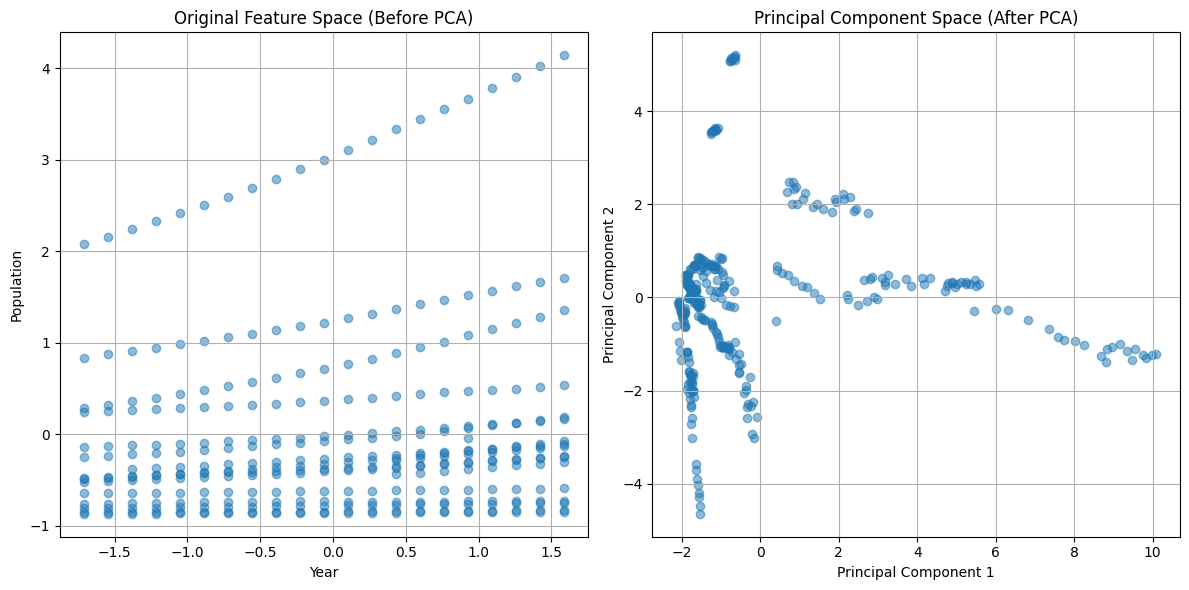

In [ ]:
# Step 8: Visualize Before and After PCA
import matplotlib.pyplot as plt

# Plot original data (first two features for simplicity)
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.scatter(X_standardized[:,0], X_standardized[:,1], alpha=0.5)
plt.title("Original Feature Space (Before PCA)")
plt.xlabel(numeric_df.columns[0]) # Corrected variable name
plt.ylabel(numeric_df.columns[1]) # Corrected variable name
plt.grid(True)


# Plot reduced data after PCA
plt.subplot(1,2,2) # Added subplot for the second plot
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5, label='PCA Reduced Data')
plt.title("Principal Component Space (After PCA)") # Updated title for clarity
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True) # Added grid for consistency

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

# Interpretation of PCA Results

Interpretation of PCA Results:

Original data had 16 numeric features.
After PCA, we retained 6 principal components to capture 95% of the variance.

Observations:
1. PCA has rotated the original feature space to a new set of axes (principal components) where:
   - PC1 captures the largest variance direction in the data.
   - PC2 captures the second largest variance, orthogonal to PC1.
2. The cumulative explained variance plot shows how many components are required to preserve most of the dataset's information.
3. The PCA-reduced plot (PC1 vs PC2) allows visualization of patterns and clusters that might not be visible in the original feature space.
4. Dimensionality reduction helps reduce noise, computational cost, and multicollinearity while retaining most of the information.
5. Features with higher weights in the eigenvectors contribute more to the corresponding principal components, helping identify the most influential variables.

Conclusion:
PCA effectively reduced the dataset's dimensionality from 16 to 6 components, while retaining 95% of the variance.
This demonstrates that much of the original information can be represented in a lower-dimensional space without significant loss, which is the main goal of PCA.